In [35]:
import skimage
from skimage import data
import os
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import cv2

Визначаємо функцію для виділення характеристичної ознаки зображення. Тут - сума точок контурів на зображенні.

In [36]:
def preprocess_image(image_path):
    image = io.imread(image_path)
    if image.shape[2] > 3:
        pic = np.delete(image, 3, 2)
    return image

In [37]:
def preprocess_image_list(images):
    result_image_list = []
    for image_path in images:
        image = preprocess_image(image_path)
        result_image_list.append(io.imread(image_path))
    return result_image_list

In [38]:
def process_image(pic, x_axis_size, y_axis_size):
    edges = cv2.Canny(pic, x_axis_size, y_axis_size)
    res = np.sum(np.square(np.array(edges))) / x_axis_size / y_axis_size
    return edges, res

In [39]:
def process_image_list(images):
    preprocessed = preprocess_image_list(images)
    canny_images = []
    calculations = []
    for image in preprocessed:
        temp_canny, temp_calc = process_image(image, image.shape[0], image.shape[1])
        canny_images.append(temp_canny)
        calculations.append(temp_calc)
    return canny_images, calculations


In [40]:
def print_paths_canny_images(paths, canny_images, results):
    if len(paths) != len(canny_images) or len(results) != len(canny_images) or len(results) != len(paths):
        return
    for i in range(len(paths)):
        print(paths[i], end=' ')
        plt.subplot(5, 6, i + 1)
        plt.imshow(canny_images[i])
        print(":- \t", results[i], end='\t, ')
        if i % 3 == 0:
            print('', end='\n')

In [41]:
def create_correct_result(a, b=0):
    if b != 0:
        return np.concatenate((np.ones(a), np.zeros(b)))
    else:
        half_size = int(a / 2)
        ones = np.ones(half_size)
        zeros = np.zeros(half_size)
        return np.concatenate((ones, zeros))

In [42]:
def check_recognition_correctness(predicted, correct_prediction):
    if predicted.shape[0] != correct_prediction.shape[0]:
        return
    correct_counter = 0
    for iterator in range(predicted.shape[0]):
        if predicted[iterator] == correct_prediction[iterator]:
            correct_counter += 1
    correct_percent = correct_counter / predicted.shape[0]
    print("recognition correctness = ", correct_percent, "% (" , correct_counter , "/", predicted.shape[0], ")")

Далі знаходимо харатристичні ознаки по наших зображеннях: 5 з зайнятим паркомісцем и 5 - з пустим

./dataset/temp10.jpg :- 	 0.14431818181818182	, 
./dataset/temp11.jpg :- 	 0.15633152719245433	, ./dataset/temp12.jpg :- 	 0.14543394911118857	, ./dataset/temp13.jpg :- 	 0.16126257848112155	, 
./dataset/temp14.jpg :- 	 0.15653220951234195	, ./dataset/temp15.jpg :- 	 0.130558183538316	, ./dataset/temp16.jpg :- 	 0.14635761589403976	, 
./dataset/temp17.jpg :- 	 0.1629967776584318	, ./dataset/temp18.jpg :- 	 0.15279958137100993	, ./dataset/temp19.jpg :- 	 0.12679425837320574	, 
./dataset/temp20.jpg :- 	 0.13386880856760375	, ./dataset/temp21.jpg :- 	 0.13969292725899823	, ./dataset/temp22.jpg :- 	 0.13807766367137356	, 
./dataset/temp23.jpg :- 	 0.16258223684210527	, ./dataset/temp24.jpg :- 	 0.13361486486486485	, ./dataset/temp36.jpg :- 	 0.08605064000747453	, 
./dataset/temp37.jpg :- 	 0.06302158273381295	, ./dataset/temp38.jpg :- 	 0.045957284515636916	, ./dataset/temp39.jpg :- 	 0.057604109337736194	, 
./dataset/temp40.jpg :- 	 0.05359200922013062	, ./dataset/temp41.jpg :- 	 0.072737

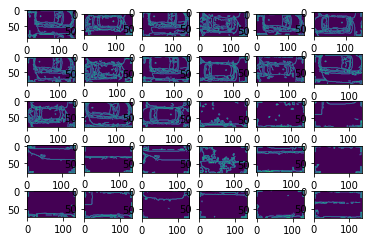

In [43]:
images = ["./dataset/temp10.jpg", "./dataset/temp11.jpg", "./dataset/temp12.jpg",
          "./dataset/temp13.jpg", "./dataset/temp14.jpg", "./dataset/temp15.jpg",
          "./dataset/temp16.jpg", "./dataset/temp17.jpg", "./dataset/temp18.jpg",
          "./dataset/temp19.jpg", "./dataset/temp20.jpg", "./dataset/temp21.jpg",
          "./dataset/temp22.jpg", "./dataset/temp23.jpg", "./dataset/temp24.jpg",
          "./dataset/temp36.jpg", "./dataset/temp37.jpg", "./dataset/temp38.jpg",
          "./dataset/temp39.jpg", "./dataset/temp40.jpg", "./dataset/temp41.jpg",
          "./dataset/temp42.jpg", "./dataset/temp43.jpg", "./dataset/temp44.jpg",
          "./dataset/temp45.jpg", "./dataset/temp46.jpg", "./dataset/temp47.jpg",
          "./dataset/temp48.jpg", "./dataset/temp49.jpg", "./dataset/temp50.jpg", ]

canny_images, results = process_image_list(images)
print_paths_canny_images(images, canny_images, results)


Формуємо вектор ознак та результату для навчання логістичної регресії

In [44]:
x = np.array(results).reshape(-1, 1)
y = create_correct_result(len(x))

In [45]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

Перевіряємо похибку на навчальній вибірці

In [46]:
learning_data_recognition = model.predict(x)
check_recognition_correctness(y, learning_data_recognition)

recognition correctness =  0.9666666666666667 % ( 29 / 30 )


І формуємо тестову вибірку

./dataset/temp25.jpg :- 	 0.16427977455419016	, 
./dataset/temp26.jpg :- 	 0.1457264957264957	, ./dataset/temp27.jpg :- 	 0.1356393315196269	, ./dataset/temp28.jpg :- 	 0.16984797297297297	, 
./dataset/temp29.jpg :- 	 0.17177663314528657	, ./dataset/temp30.jpg :- 	 0.131041717098362	, ./dataset/temp31.jpg :- 	 0.15963470319634704	, 
./dataset/temp32.jpg :- 	 0.14004358028830036	, ./dataset/temp33.jpg :- 	 0.10657534246575343	, ./dataset/temp34.jpg :- 	 0.12100335629747394	, 
./dataset/temp51.jpg :- 	 0.04633204633204633	, ./dataset/temp52.jpg :- 	 0.06458468077242908	, ./dataset/temp53.jpg :- 	 0.038553259141494434	, 
./dataset/temp54.jpg :- 	 0.03901234567901234	, ./dataset/temp55.jpg :- 	 0.045158821278224265	, ./dataset/temp56.jpg :- 	 0.0635820895522388	, 
./dataset/temp57.jpg :- 	 0.0791111111111111	, ./dataset/temp58.jpg :- 	 0.05137751303052867	, ./dataset/temp59.jpg :- 	 0.04059701492537314	, 
./dataset/temp60.jpg :- 	 0.05359907120743034	, 

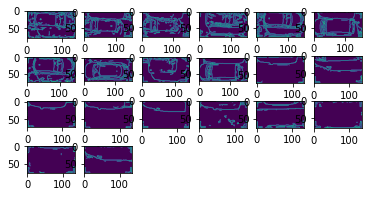

In [47]:
images = ["./dataset/temp25.jpg", "./dataset/temp26.jpg", "./dataset/temp27.jpg",
          "./dataset/temp28.jpg", "./dataset/temp29.jpg", "./dataset/temp30.jpg",
          "./dataset/temp31.jpg", "./dataset/temp32.jpg", "./dataset/temp33.jpg",
          "./dataset/temp34.jpg", "./dataset/temp51.jpg", "./dataset/temp52.jpg",
          "./dataset/temp53.jpg", "./dataset/temp54.jpg", "./dataset/temp55.jpg",
          "./dataset/temp56.jpg", "./dataset/temp57.jpg", "./dataset/temp58.jpg",
          "./dataset/temp59.jpg", "./dataset/temp60.jpg", ]
canny_images, results = process_image_list(images)
print_paths_canny_images(images, canny_images, results)

Перевіряємо помилку розпізнавання для тестової вибірки

In [48]:
testing_data_recognition = model.predict(np.array(results).reshape(-1, 1))
testing_data_correct_result = create_correct_result(len(results))
check_recognition_correctness(testing_data_recognition, testing_data_correct_result)

recognition correctness =  1.0 % ( 20 / 20 )
